In [1]:
import json
import os
import numpy as np
import PIL.Image
import cv2
import matplotlib.pyplot as plt

In [2]:
with open("SegmentJSON_json.json", "r") as read_file:
    data = json.load(read_file)

all_file_names=list(data.keys())

In [4]:
Files_in_directory = []
for root, dirs, files in os.walk("Segmentation"):
    for filename in files:
        Files_in_directory.append(filename)

0
1
2
3
4
5
6
7
8
9


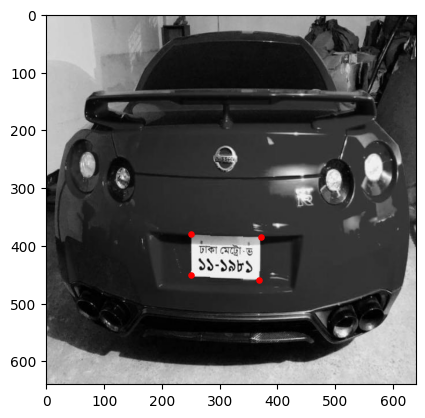

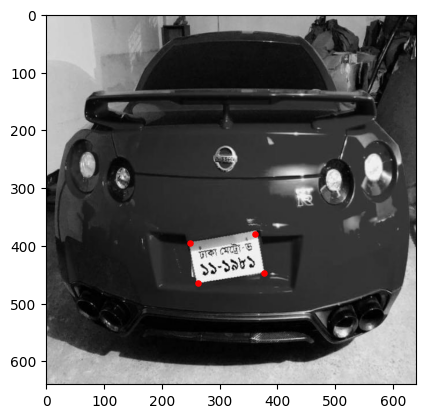

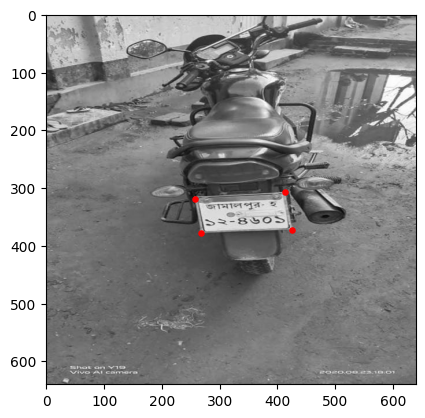

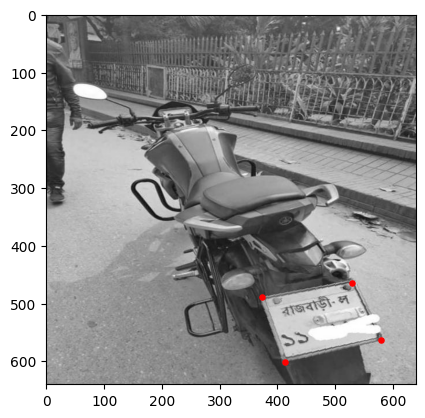

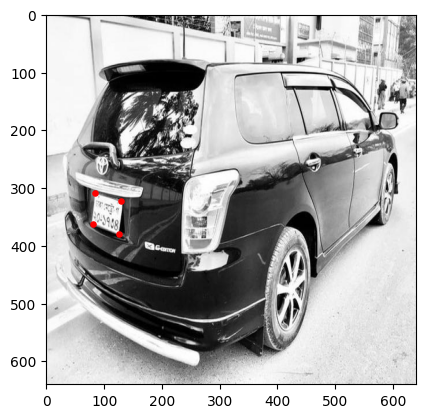

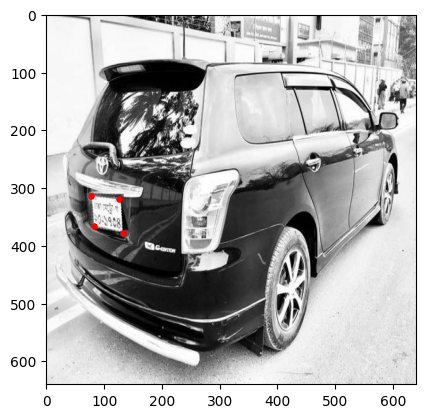

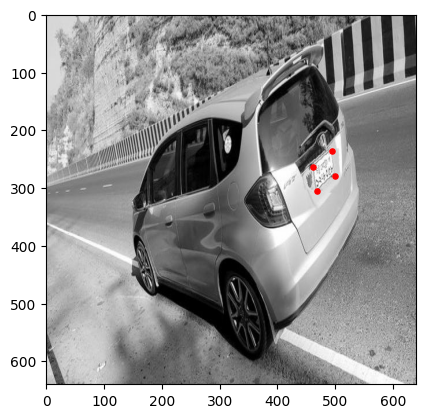

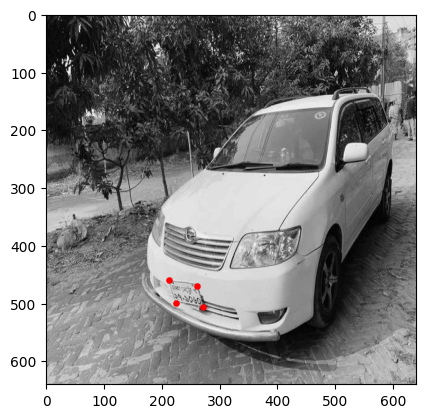

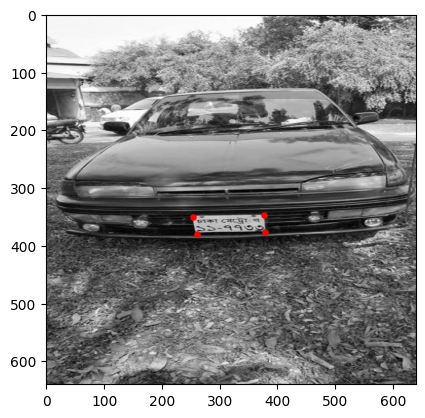

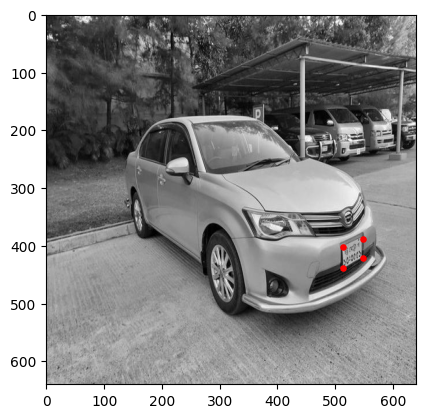

In [7]:
for j in range(len(all_file_names)): 
    image_name=data[all_file_names[j]]['filename']
    if image_name in Files_in_directory: 
         img = np.asarray(PIL.Image.open('segmentation/'+image_name))    
    else:
        continue
    if data[all_file_names[j]]['regions'] != {}:
        #cv2.imwrite('images/%05.0f' % j +'.jpg',img)
        print(j)
        try: 
             shape1_x=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_x']
             shape1_y=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_y']
        except : 
             shape1_x=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_x']
             shape1_y=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_y']
    
        fig = plt.figure()
      
        plt.imshow(img.astype(np.uint8)) 
        plt.scatter(shape1_x,shape1_y,zorder=2,color='red',marker = '.', s= 55)
        

        ab=np.stack((shape1_x, shape1_y), axis=1)
        
        img2=cv2.drawContours(img, [ab], -1, (255,255,255), -1)
       
        
        
        mask = np.zeros((img.shape[0],img.shape[1]))
        img3=cv2.drawContours(mask, [ab], -1, 255, -1)
        
        cv2.imwrite('binary_masks/%05.0f' % j +'.png',mask.astype(np.uint8))
        